In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [2]:
class PCA():
    def calculate_covariance_matrix(self, X, Y=None):
        m = X.shape[0]
        X = X-np.mean(X, axis=0)
        Y = X if not Y else Y-np.mean(Y, axis=0)
        return 1/m*np.matmul(X.T,Y)
    
    def transform(self, X, n_components):
        # Let n = X.shape[1], reduct the dimension to n_component 
        covariance_matrix = self.calculate_covariance_matrix(X)
        
        # Get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        # Sort the eigenvalues, and retrieve the first n_component values
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components]
        
        # Transform data to n_component dimensions
        return np.matmul(X, eigenvectors)

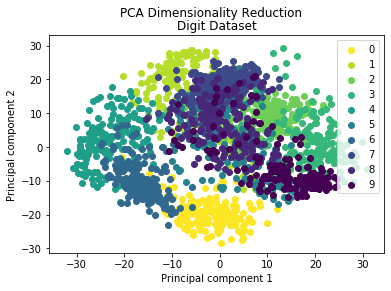

In [14]:
def main():
    # Reduce dimension to 2 and plot the results
    # Load the dataset
    data = datasets.load_digits()
    X = data.data
    y = data.target
    
    # Project the data onto the 2 primary principal components
    X_trans = PCA().transform(X, 2)
    
    x1 = X_trans[:, 0]
    x2 = X_trans[:, 1]
    
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(1, 0, len(np.unique(y)))]
    
    class_distr=[]
    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        _x1 = x1[y==l]
        _x2 = x2[y==l]
        _y = y[y==l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))
        
    # Add a legend
    plt.legend(class_distr, y, loc=1)

    #Axis labels
    plt.suptitle("PCA Dimensionality Reduction")
    plt.title('Digit Dataset')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.show()
    
if __name__ =='__main__':
    main()
    
    